### Image Segmentation

With opencv I am applying the classical image processing steps for image segmentation. This includes;

1. Greyscale Conversion: Image processing steps will work better with greyscale images, as this will reduce complexity.
2. Noise Removal: Gaussian Blurr is used to smooth out the image to remove any noise present. 
3. Edge Detection: To find the boundaries of capacitor and resistor. Canny edge detector does this job fairly.
4. Thresholding: To distinguish the foreground and background. As lighting in images may vary, I opted for adaptive thresholding.
5. Contouring: To detect the boundaries of the object present in the image. 


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# method to display image

def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

### Image Preprocessing

Grayscale conversion to reduce complexity


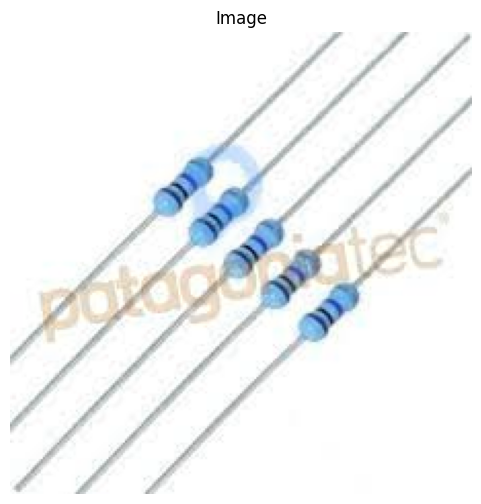

In [105]:
image = cv2.imread('Dataset/Resistor/Resistor (21).jpeg')
show_image('Image', image)

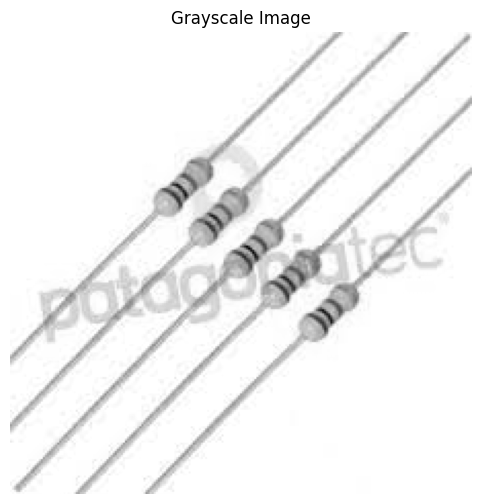

In [106]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image('Grayscale Image', gray)

### Gaussian Blur

To remove any noise present

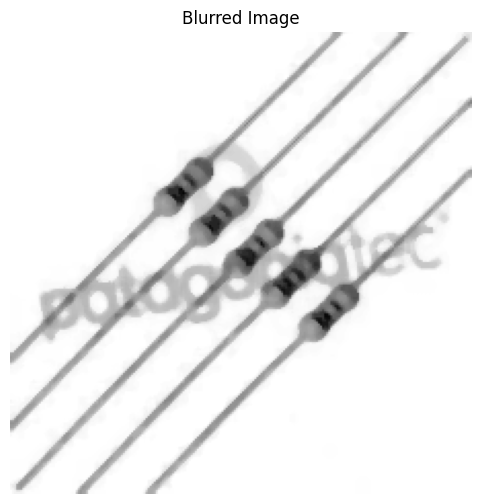

In [107]:
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = cv2.medianBlur(gray, 5)
show_image('Blurred Image', blurred)

### Edge Detection
Canny Edge Detection to find boundaries

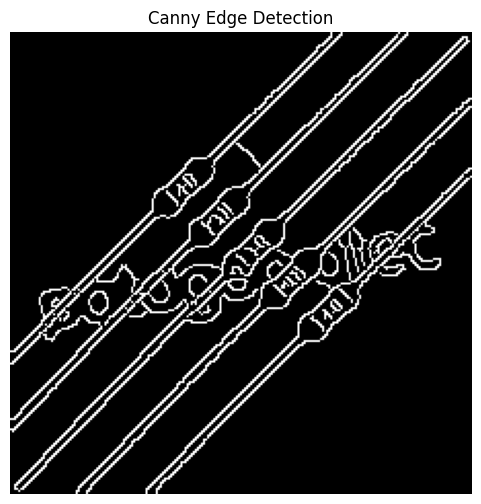

In [108]:
edges = cv2.Canny(blurred, 50, 150)
show_image('Canny Edge Detection', edges)

### Thresholding
Thresholding(adaptive) for distinguishing foreground and background

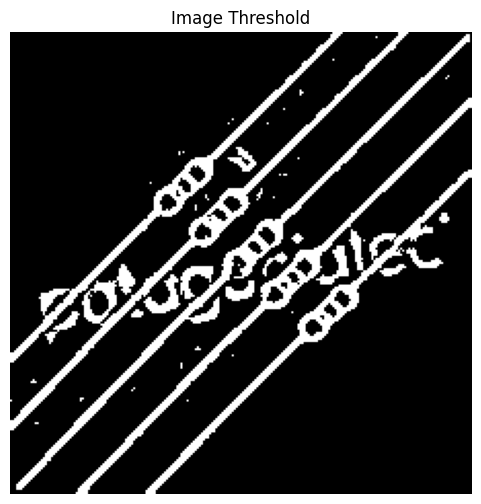

In [118]:
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
#ret, binary = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY_INV)
show_image('Image Threshold', binary)

### Combine edges and thresholding

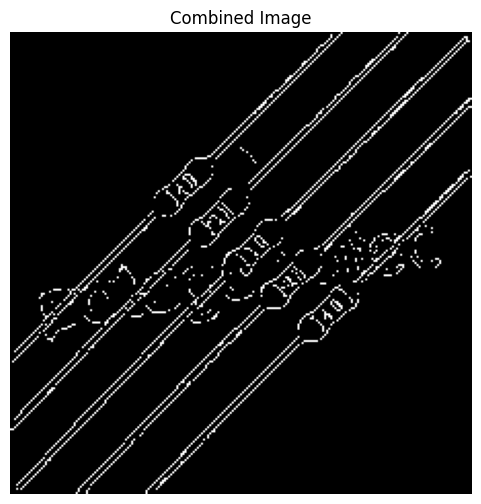

In [110]:
# Combine edges with binary threshold
combined = cv2.bitwise_and(binary, edges)
show_image('Combined Image', combined)

### Morphological Operation (Optional)
Apply morphological operations to remove noise and small artifacts or fill gaps within the components. 

This operation did not produce good result on the images that I tested, so I am not using this for the actual segmentation.<br /> But still keeping it here as an option. 

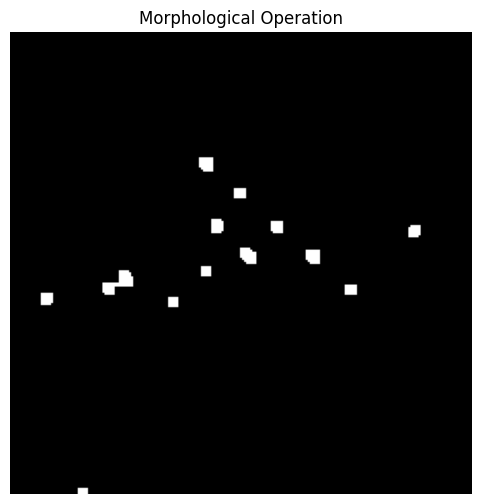

In [120]:
kernel = np.ones((5,5), np.uint8)

# Dilation followed by Erosion
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
# Opening (erosion followed by dilation) removes small objects
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion) fills gaps
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
show_image('Morphological Operation', binary)

### Contour Detection
To detect boundaries of capacitor and resistor.
You can use either the detected edges, thresholds or combined (edges, thresholds) for segmentation

depending which works better for the particular image. 

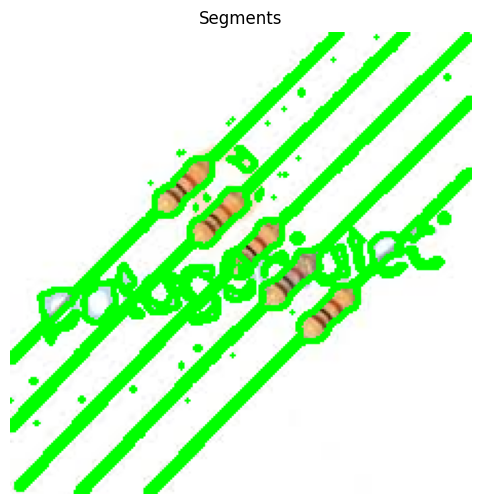

In [116]:
# use either edges, binary or combined for segementation
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contoured_image = image.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
show_image('Segments', cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB), cmap_type=None)